## Multivariate linear regression

### Initialising program
- Importing libraries.
- Initialising hyperparameters.

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/lumidenoir/Project2022/assignment/Applications_Of_Reinforcement_Learning/Assignment-2/210299_krishna%20dantu/CarPrice_Assignment.csv"
query=[[190.9,70.3,54.9,183,3.64,123]]
alpha=0.01
cycle=5000

### Functions:

#### Normalisation functions

In [330]:
def normalise(matrix):
    factor1=matrix.min()
    factor2=matrix.max()-matrix.min()
    matrix_nor = (matrix-factor1)/factor2
    return matrix_nor,factor1,factor2

def stdnormalise(matrix):
    factor1=matrix.mean()
    factor2=matrix.std()
    matrix_std = (matrix-factor1)/factor2
    return matrix_std,factor1,factor2

#### Splitting and Stacking functions:

In [331]:
def split(matrix,ratio):
    m=matrix.shape[0]
    n=int(m*ratio)
    traindata=matrix.iloc[0:n].values
    testdata=matrix.iloc[n:m].values
    return traindata,testdata

def concatenate(matrix):
    matrix=np.concatenate((np.ones((matrix.shape[0],1)),matrix), axis=1)
    return matrix

#### Cost function and Gradient descent function:

In [332]:
def costfunction(X,y,theta):
    sqr_error=((X.dot(theta.T))-y)**2
    sumofsquares=np.sum(sqr_error)
    return (1/2*X.shape[0])*sumofsquares

def gradientdescent(X,y,theta,cycle,alpha):
    cost = np.zeros(cycle)
    for i in range(cycle):
        error=((X.dot(theta.T))-y)
        multiplyerror = (error.T@X)
        theta = theta-(alpha/X.shape[1])*multiplyerror
        cost[i] = costfunction(X, y, theta)
    
    return theta,cost

#### Prediction and r2 score function:

In [333]:
def predict(X,theta):
    y_predict=X.dot(theta.T)
    return y_predict

def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

### Importing data from dataset:

In [334]:
my_data=pd.read_csv(url, skipinitialspace=True, usecols=['carlength','carwidth','carheight','enginesize','stroke','horsepower'])
price_data=pd.read_csv(url, skipinitialspace=True, usecols=['price'])
theta=np.zeros((1,my_data.shape[1]+1))#initialised theta

### For 80:20 splitting:
##### Calculations:

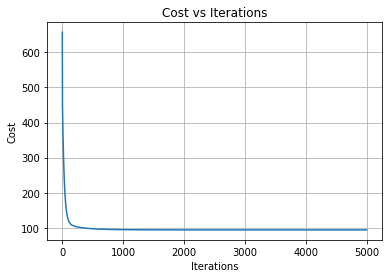

In [335]:
#normalising data
my_data_nor,fac1_nor,fac2_nor=normalise(my_data)
price_data_nor,fac3_nor,fac4_nor=normalise(price_data)
#splitting data 80:20
train_data,test_data=split(my_data_nor,0.8)
train_price,test_price=split(price_data_nor,0.8)
#stacking a coloumn for constant
train_data=concatenate(train_data)
test_data=concatenate(test_data)
#calculating gradient descent
theta, cost=gradientdescent(train_data,train_price,theta,cycle,alpha)
#producing graph
plt.plot(range(cycle),cost, label="normal")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.title("Cost vs Iterations")
plt.show()

##### Predicting values and calculating accuracy:

In [336]:
train_predict=predict(train_data,theta)
test_predict=predict(test_data,theta)
print("r2 score for train values",r2score(train_predict,train_price))
print("r2 score for test values",r2score(test_predict,test_price))

r2 score for train values 0.8485142777564624
r2 score for test values 0.39673821832959866


##### Predicting the price for the query:

In [337]:
query_nor=concatenate((query-np.array(fac1_nor))/np.array(fac2_nor))#normalising query values
query_predict=predict(query_nor,theta)
predict_convert=query_predict[0,0]*fac4_nor+fac3_nor#denormalising predicted pricee
print("price prediction for query",float(predict_convert))

price prediction for query 22811.75394080996


##### Using sklearn library to check the above solution:

In [338]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_data,train_price)
y_prediction=model.predict(query_nor)
y_predict=model.predict(train_data)
y1_predict=model.predict(test_data)
print("r2 score of training data",r2score(y_predict,train_price))
print("r2 score of testing data",r2score(y1_predict,test_price))
print("price prediction for query",float(y_prediction[0,0]*fac4_nor+fac3_nor))

r2 score of training data 0.8485146079419813
r2 score of testing data 0.39741762020862736
price prediction for query 22817.215899342093


### For 90:10 splitting:
##### Calculations:

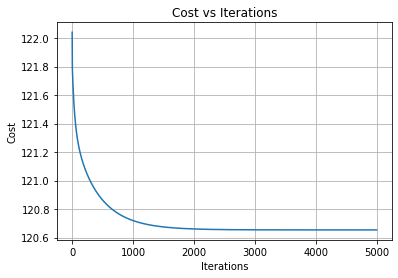

In [339]:
#normalising data
my_data_nor,fac1_nor,fac2_nor=normalise(my_data)
price_data_nor,fac3_nor,fac4_nor=normalise(price_data)
#splitting data 90:10
train_data,test_data=split(my_data_nor,0.9)
train_price,test_price=split(price_data_nor,0.9)
#stacking a coloumn for constant
train_data=concatenate(train_data)
test_data=concatenate(test_data)
#calculating gradient descent
theta, cost=gradientdescent(train_data,train_price,theta,cycle,alpha)
#producing graph
plt.plot(range(cycle),cost, label="normal")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.title("Cost vs Iterations")
plt.show()

##### Predicting values and accuracy:

In [340]:
train_predict=predict(train_data,theta)
test_predict=predict(test_data,theta)
print("r2 score for train values",r2score(train_predict,train_price))
print("r2 score for test values",r2score(test_predict,test_price))

r2 score for train values 0.8302708083375465
r2 score for test values 0.7093473960792083


##### Predicting the price for query:

In [341]:
query_nor=concatenate((query-np.array(fac1_nor))/np.array(fac2_nor))#normalising query values
query_predict=predict(query_nor,theta)
predict_convert=query_predict[0,0]*fac4_nor+fac3_nor#denormalising the predicted price
print("price prediction for query",float(predict_convert))

price prediction for query 22543.845512122734


##### Using sklearn library to check the above solution:

In [342]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_data,train_price)
y_prediction=model.predict(query_nor)
y_predict=model.predict(train_data)
y1_predict=model.predict(test_data)
print("r2 score of training data",r2score(y_predict,train_price))
print("r2 score of testing data",r2score(y1_predict,test_price))
print("price prediction for query",float(y_prediction[0,0]*fac4_nor+fac3_nor))

r2 score of training data 0.830270819904335
r2 score of testing data 0.7093775788723966
price prediction for query 22544.961740730076
